In [46]:
import pandas as pd
wine =pd.read_csv('https://bit.ly/wine-date')
wine.head()


,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


0.7808350971714451
0.7776923076923077


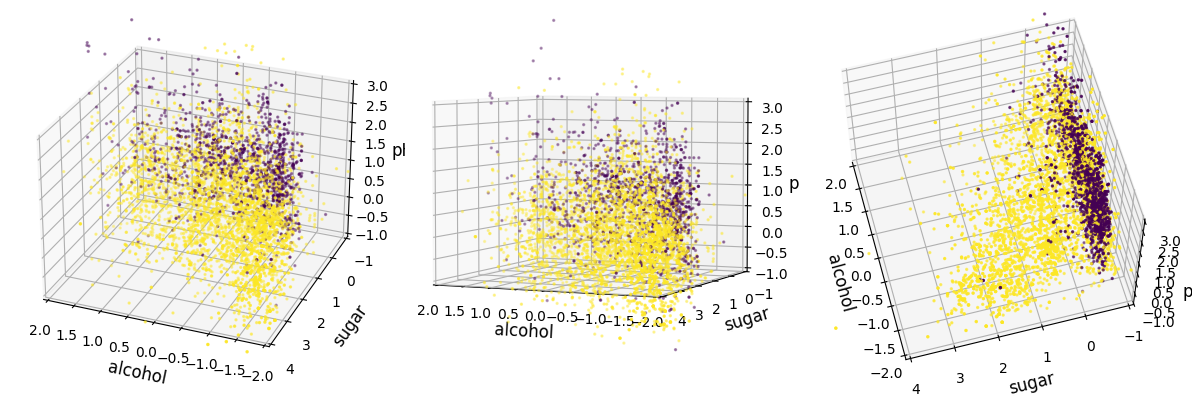

In [134]:
#logistic regression
data = wine[['alcohol','sugar','pH']]
target = wine['class']
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data,target,test_size=0.2,random_state=42)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled,train_target)

train_result =lr.predict(train_scaled)
test_result = lr.predict(test_scaled)

from sklearn.metrics import accuracy_score
print(accuracy_score(train_target,train_result))
print(accuracy_score(test_target,test_result))



from matplotlib import pyplot as plt

plt.style.use('default')
 
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')


axes = [ax1, ax2, ax3]
for ax in axes:
    ax.scatter(train_scaled[:, 0], train_scaled[:, 1], train_scaled[:, 2], c=train_target, zorder=15, s=2,  depthshade=True) #훈련데이터의 산점도
    ax.set_xlabel('alcohol', fontsize=12) #해당 축을 설명하는 라벨
    ax.set_ylabel('sugar', fontsize=12)
    ax.set_zlabel('pH', fontsize=12)

    ax.set_xlim(-2, 2) #z축의 범위를 지정
    ax.set_ylim(-1, 4) #z축의 범위를 지정
    ax.set_zlim(-1, 3) #z축의 범위를 지정
    

#높이와 방위각을 조절해서 보고 싶은 위치를 조정할 수 있음
#elevation (높이), azimuth (방위각)
ax1.view_init(elev=27, azim=112) 
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)
 

fig.tight_layout()





0.996921300750433
0.8592307692307692


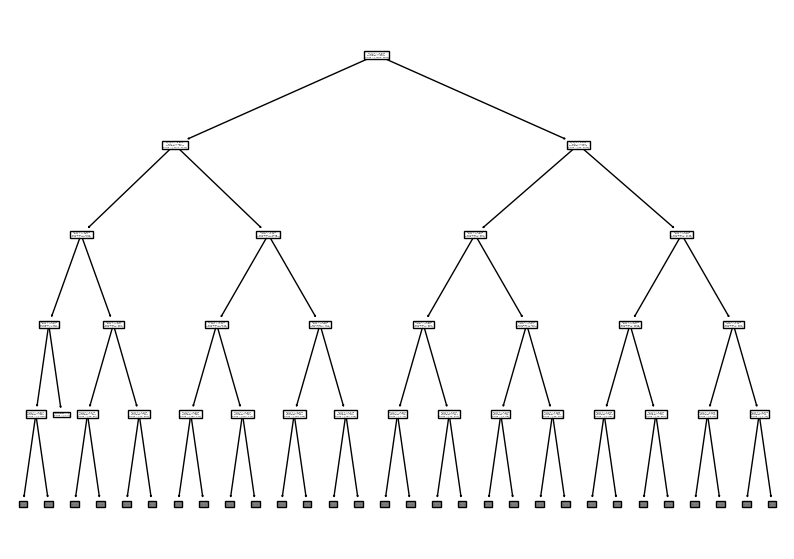

In [151]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled,train_target)

print(dt.score(train_scaled,train_target))
print(dt.score(test_scaled,test_target))


plt.figure(figsize=(10, 7))
plot_tree(dt,max_depth=4)
plt.savefig('decision_tree.svg', format='svg')
plt.show()